# Exploratory Data Analysis

The purpose of this section of the notebook is to provide some key highlights of the baseline data being used. This showcases the various attributes, any specific transformations, and key relationships.

In [49]:
# ! pip update --user pandas==1.4.0

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the primary dataset
df = pd.read_csv('./../datasets/original/WA_Fn-UseC_-Telco-Customer-Churn.csv')

As can be seen below, the dataset contains 21 columns and 7,043 rows

In [51]:
df.shape

(7043, 21)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Attribute Definitions
- **customerID** is the unique identifier per customer.
- **MonthlyCharges** and **TotalCharges** identify the monthly and total spending to date for the population. Both should be float attributes.
- **tenure** is how long the customer has been with the service, measured in months.
- All other 16 attributes are categorical and highlight customer attributes (e.g. Senior Citizen) or usage of various features or (e.g. Phone Service).

In [53]:
df.sample(n=5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2178,1657-DYMBM,Male,0,Yes,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1110.05,No
1217,0784-GTUUK,Male,0,Yes,No,62,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),23.75,1446.8,No
491,6778-YSNIH,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,59.00,114.15,No
4522,7305-ZWMAJ,Male,0,Yes,No,30,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.70,587.1,No
5734,6408-WHTEF,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55,No


## Basic Transformations

Converting **Total Charges** to a float attribute.

In [54]:
df['TotalCharges'] = df['TotalCharges'].str.replace(r' ','0').astype(float)
df['TotalCharges'].dtypes

dtype('float64')

- Changing **Churn** to better represent a binary attribute with 1s and 0s vs. "No" or "Yes". This aids further computation.
- Changing **Senior Citizen** to a categorical attribute (No/Yes) from 1s and 0s.
- Changing a number of other columns to showcase visualizations better.

In [55]:
df['Churn'] = df['Churn'].apply(lambda x: 0 if x == "No" else 1)
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: "No" if x == 0 else "Yes")

# Cosmetic edits to showcase visualizations better
df['OnlineSecurity'] = df['OnlineSecurity'].apply(lambda x: "Other" if x == "No internet service" else x)
df['OnlineBackup'] = df['OnlineBackup'].apply(lambda x: "Other" if x == "No internet service" else x)
df['DeviceProtection'] = df['DeviceProtection'].apply(lambda x: "Other" if x == "No internet service" else x)
df['TechSupport'] = df['TechSupport'].apply(lambda x: "Other" if x == "No internet service" else x)
df['StreamingTV'] = df['StreamingTV'].apply(lambda x: "Other" if x == "No internet service" else x)
df['StreamingMovies'] = df['StreamingMovies'].apply(lambda x: "Other" if x == "No internet service" else x)

df['MultipleLines'] = df['MultipleLines'].apply(lambda x: "Other" if x == "No phone service" else x)

df['PaymentMethod'] = df['PaymentMethod'].map({'Bank transfer (automatic)':'Bank','Credit card (automatic)':'Credit','Mailed check':'MCheck','Electronic check':'ECheck',})

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,Other,DSL,No,...,No,No,No,No,Month-to-month,Yes,ECheck,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,MCheck,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,MCheck,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,Other,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank,42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,ECheck,70.70,151.65,1


Bin the **tenure** attribute into 10 buckets.

In [56]:
df['tenure_bins'] = pd.cut(df['tenure'], bins=10, include_lowest=True)

Bin the **MonthlyCharges** attribute into 10 buckets.

In [57]:
df['monthlyCharges_bins'] = pd.cut(df['MonthlyCharges'], bins=10, include_lowest=True)

## Basic Analyses

### Customer counts by categorical attributes

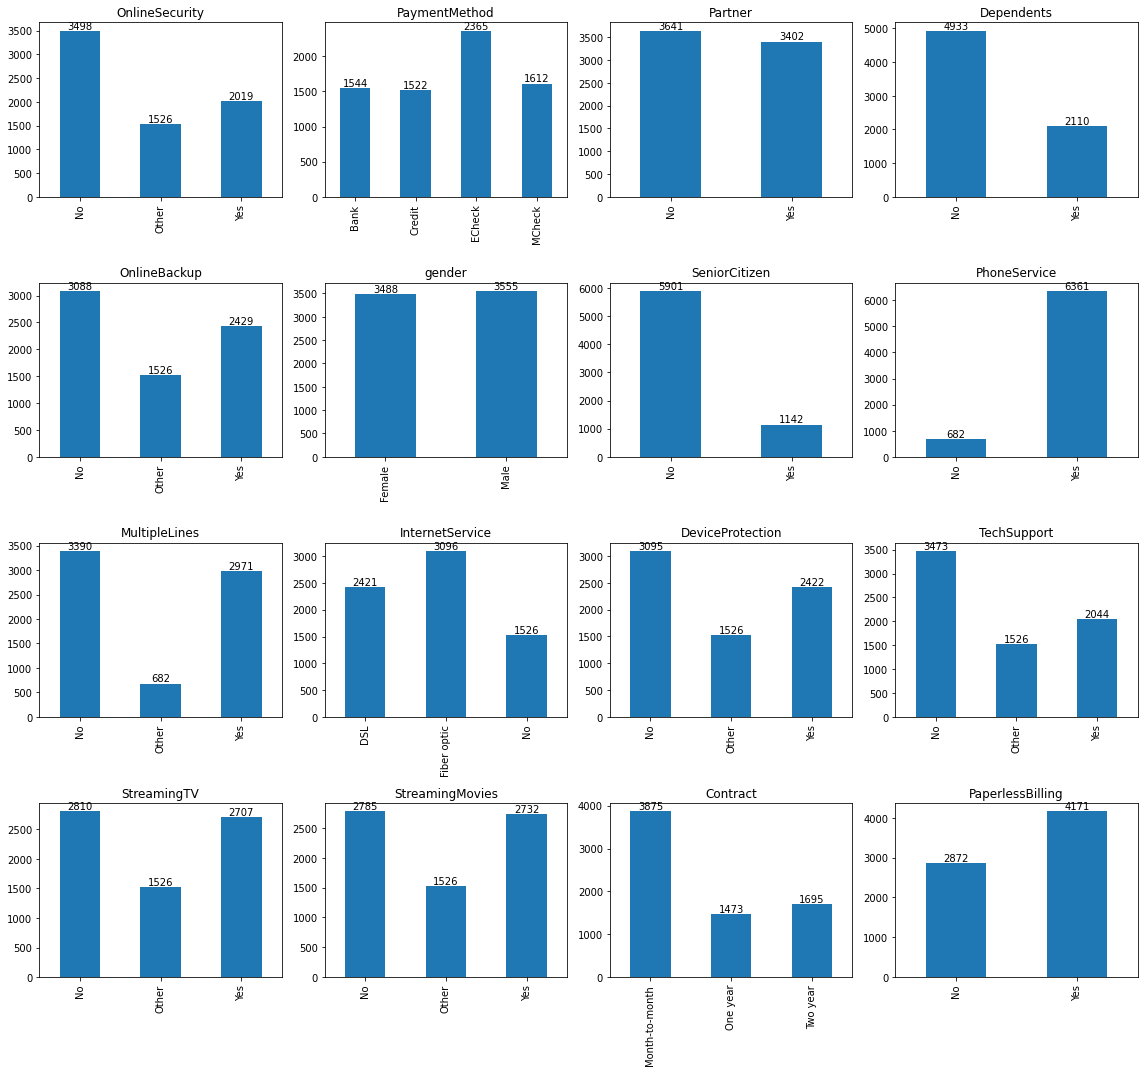

In [58]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 15))
column_list=['OnlineSecurity', 'PaymentMethod', 'Partner', 'Dependents','OnlineBackup',
        'gender', 'SeniorCitizen', 'PhoneService', 'MultipleLines','InternetService',
         'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies',
         'Contract','PaperlessBilling']

# Iterate through all combinations
for i, var in enumerate(column_list):
    # Adjusting for the multi-line assignments
    if i <=3:
        pos1=0
        pos2=i
    elif i <=7:
        pos1=1
        pos2=i-4
    elif i <=11:
        pos1=2
        pos2=i-8
    elif i <=15:
        pos1=3
        pos2=i-12        
    tt = df.groupby(var).size().to_frame()
    tt.index.rename('', inplace=True) # To remove extra index labels for visualizations
    tdf = tt.plot(kind='bar', ax=axes[pos1,pos2], title=str(var), legend=None)

    for container in tdf.containers:
        tdf.bar_label(container)
    
plt.tight_layout()

### Histogram of Customer Tenure (in months)

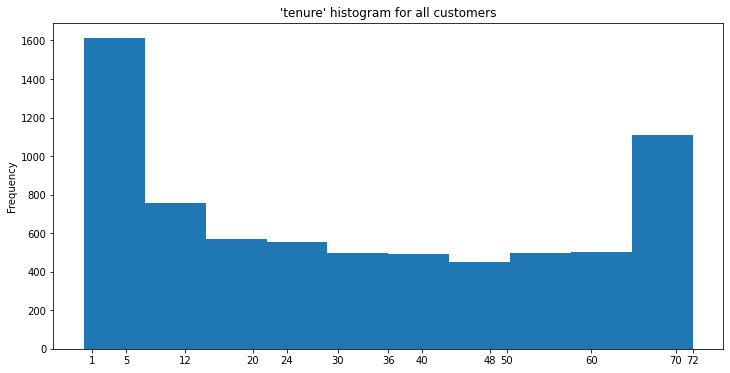

In [59]:
ax = df['tenure'].plot(
    kind='hist',
    title="'tenure' histogram for all customers",
    figsize=(12,6), 
    xticks=[1,5,12,20,24,30,36,40,48,50,60,70,72]
)

This is an interesting histogram where a large percentage of customers are fairly new (less than a year old) while a number of older customers (greater than 5 years) make up another large percentage.

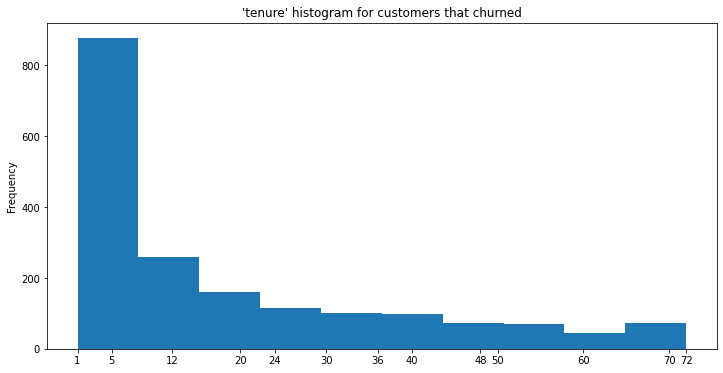

In [60]:
churned = df[ df['Churn']==1]
ax = churned['tenure'].plot(
    kind='hist',
    title="'tenure' histogram for customers that churned",
    figsize=(12,6), 
    xticks=[1,5,12,20,24,30,36,40,48,50,60,70,72])

As one would expect, most of the churned customers are less than a year old. Many organizations find this to be the biggest segment of churn, i.e. customers fairly new to the service or product.

(Note: A good lesson on survivorship bias.)

### Churned customer population
*(Note: 0 = Not churned, 1 = Churned)*

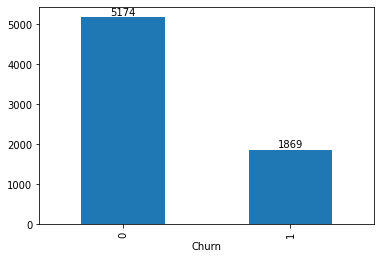

In [61]:
churn_pp = df.groupby('Churn').size().to_frame()
ax = churn_pp.plot(kind='bar', legend=None)
# ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container)

### Churn ratio by categorical attributes

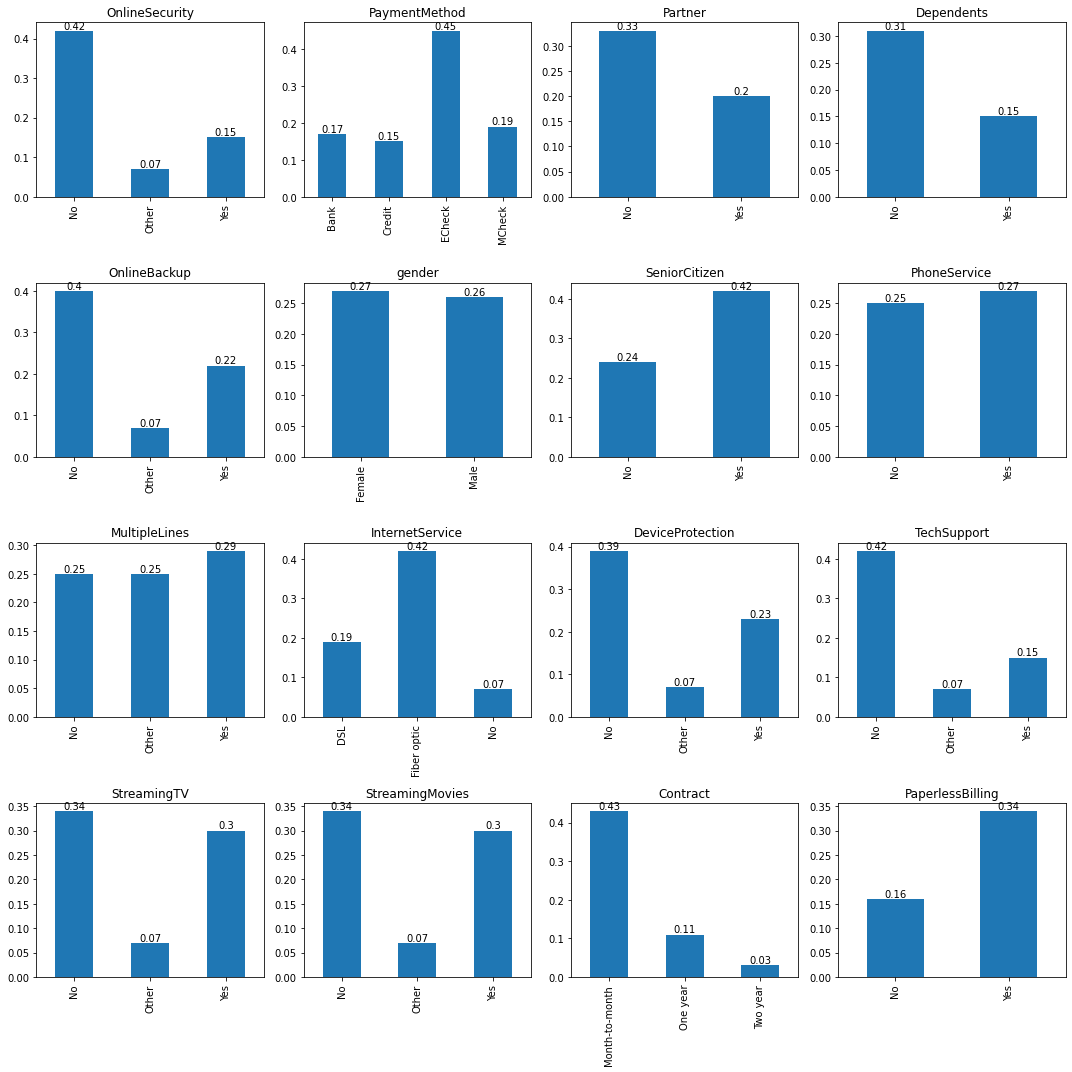

In [62]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
column_list=['OnlineSecurity', 'PaymentMethod', 'Partner', 'Dependents','OnlineBackup',
        'gender', 'SeniorCitizen', 'PhoneService', 'MultipleLines','InternetService',
         'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies',
         'Contract','PaperlessBilling']

# Iterate through all combinations
for i, var in enumerate(column_list):
    # Adjusting for the multi-line assignments
    if i <=3:
        pos1=0
        pos2=i
    elif i <=7:
        pos1=1
        pos2=i-4
    elif i <=11:
        pos1=2
        pos2=i-8
    elif i <=15:
        pos1=3
        pos2=i-12
    c_df = df.groupby(var).agg({'Churn': ['sum','count']})
    c_df.columns = ['sum', 'count']
    c_df['percent'] = (c_df['sum']/c_df['count']).round(2)
    c_df = c_df[['percent']]
    c_df.index.rename('', inplace=True) # To remove extra index labels for visualizations
    tt = c_df.plot(kind='bar', ax=axes[pos1,pos2], title=str(var), legend=None)

    for container in tt.containers:
        tt.bar_label(container)
    
plt.tight_layout()

### Exploring the relationship between tenure and monthly and total charges

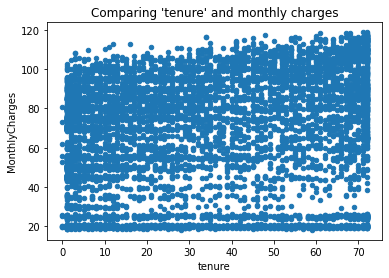

In [63]:
ax = df.plot(x='tenure', y='MonthlyCharges', kind='scatter', title="Comparing 'tenure' and monthly charges")

No particular relationship seems to be apparent.

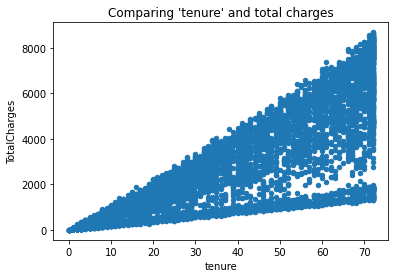

In [64]:
ax = df.plot(x='tenure', y='TotalCharges', kind='scatter', title="Comparing 'tenure' and total charges")

As one would expect, there is a linear relationship between tenure and total charges, i.e. with time, one's total charges grow.

### Monthly Charges by Uniform Spending Cohorts

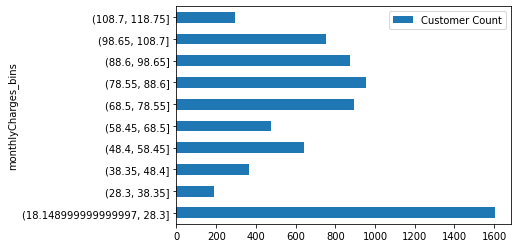

In [65]:
mc_bin = df.groupby(by='monthlyCharges_bins').size().to_frame()
mc_bin.columns = ['Customer Count']
ax = mc_bin.plot(kind='barh')

By dividing the customer base into 10 uniform cohorts, one can see that a large proportion spend less than \\$28 dollars per month. A non-trivial proportion also spends above \\$100 per month.

### Feature Importance

By focusing on most of the categorical attributes, and grouping tenure into specific bins, we can use a classifier to identify the attributes that have a stronger bearing on churn. The fact that being on a month to month contract, being early in the use of the service (tenure bin < 7 months), and paying by electronic check corroborates with the learning above around churn rates.

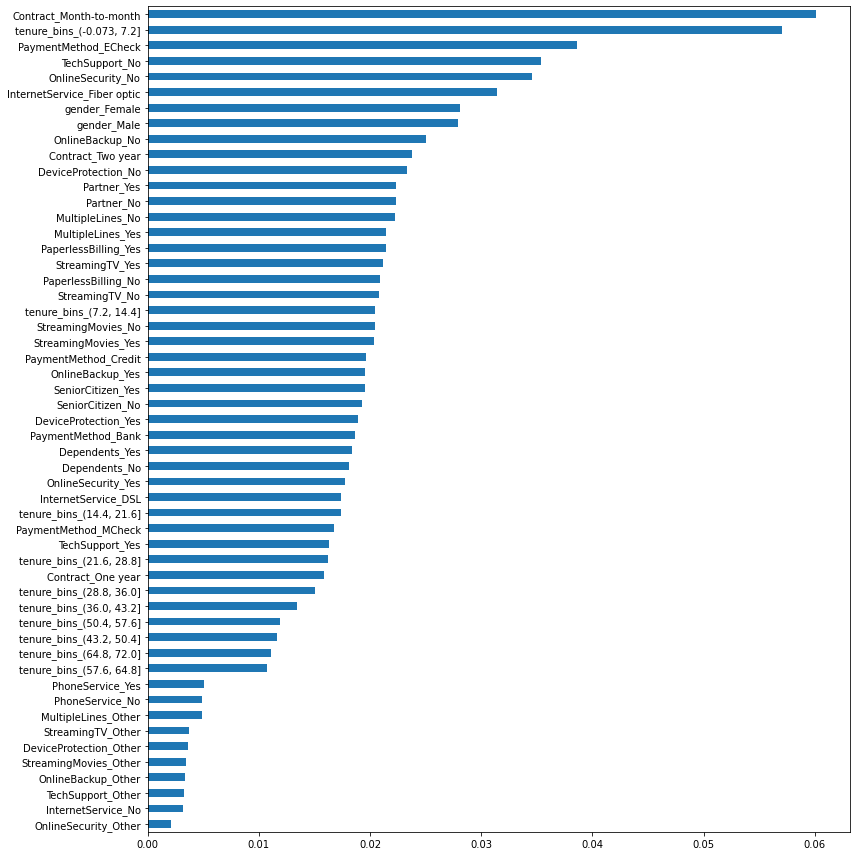

In [66]:
feature_df = df.copy()

# Drop un-needed columns, and convert categorical column to object
feature_df = feature_df.drop(['customerID','TotalCharges', 'MonthlyCharges', 'monthlyCharges_bins', 'tenure'], axis=1)
feature_df['tenure_bins'] = feature_df['tenure_bins'].astype(object)

# One hot encode categorical columns
feature_df = pd.get_dummies(feature_df)
# feature_df.info()

# Train the dataset with a Random Forest Classifier
X,y = feature_df.drop('Churn', axis=1), feature_df.Churn

from sklearn.ensemble import RandomForestClassifier
params={'random_state':42, 'n_estimators':500}
clf=RandomForestClassifier(**params)
clf.fit(X,y)

fv = pd.Series(data=clf.feature_importances_,index=X.columns).sort_values()
ax = fv.plot(kind='barh', figsize=(12,12))
plt.tight_layout()